# Velocity Dispersions

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-and-plot-$\sigma$-vs-time" data-toc-modified-id="Read-in-and-plot-$\sigma$-vs-time-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in and plot $\sigma$ vs time</a></span></li><li><span><a href="#Radial-dependency" data-toc-modified-id="Radial-dependency-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Radial dependency</a></span></li></ul></div>

In [12]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
from numpy.linalg import norm

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

%matplotlib inline

from galaxy.galaxy import Galaxy
from galaxy.centerofmass import CenterOfMass
from galaxy.timecourse import TimeCourse

In [5]:
tc = TimeCourse()

## Read in and plot $\sigma$ vs time

These are disk particles only, viewed perpendicular to rotation axis. Data was generated perviously with TimeCourse.write_vel_disp().

In [6]:
MW = tc.read_sigmas_db('MW')
t = MW['t']
sigma_MW = MW['sigma']
M31 = tc.read_sigmas_db('M31')
sigma_M31 = M31['sigma']
M33 = tc.read_sigmas_db('M33')
sigma_M33 = M33['sigma']

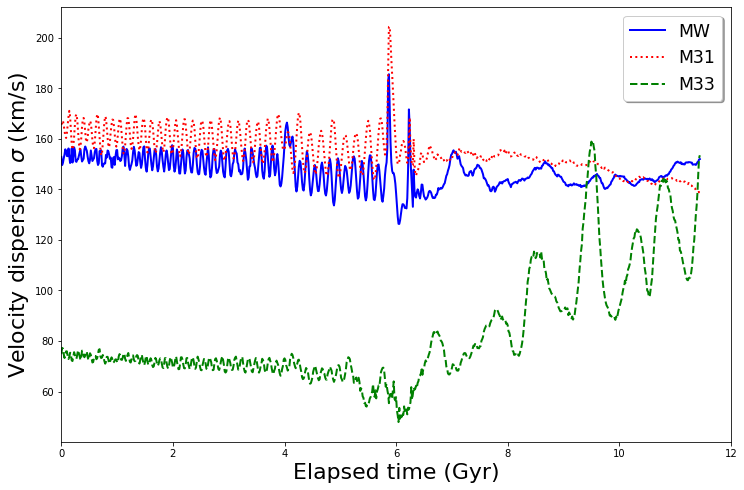

In [7]:
fig = plt.figure(figsize=(12,8))

# # set up the left subplot
# ax0 = plt.subplot(131)

# add the curves
plt.plot(t, sigma_MW, 'b-', lw=2, label='MW')
plt.plot(t, sigma_M31, 'r:', lw=2, label='M31')
plt.plot(t, sigma_M33, 'g--', lw=2, label='M33')

n=50
# plt.plot(t[:n], sigma_MW[:n], 'bo', lw=2, label='MW')
# plt.plot(t[:n], sigma_M31[:n], 'ro', lw=2, label='M31')
# plt.plot(t[:n], sigma_M33[:n], 'go', lw=2, label='M33')
plt.legend(fontsize='xx-large', shadow=True)

# Add axis labels
plt.xlabel('Elapsed time (Gyr)', fontsize=22)
plt.ylabel('Velocity dispersion $\sigma$ (km/s)', fontsize=22)

#set axis limits
#plt.ylim(0,200)
plt.xlim(0, 12)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
plt.savefig('vel_disp.pdf', rasterized=True, dpi=350);

## Radial dependency

In [20]:
def disp_by_radius(x, vy, xbins, binwidth=None):
    
    if binwidth is None:
        binwidth = x[1] - x[0]
    
    means = np.zeros(len(xbins))
    sigmas = np.zeros(len(xbins))
    
    for i, xi in enumerate(xbins):
        filt = np.where((x > xi - binwidth/2) & (x < xi + binwidth/2))
        vel = vy[filt]
        if len(vel) > 0:
            means[i] = np.mean(vel)
            sigmas[i] = np.std(vel - means[i])
        # else remain zero
    
    return means, sigmas

In [43]:
xbins = np.arange(-70, 70, 2)

for gname in ('M31',):
    snap = 0
    t = tc.snap2time(snap)

    g =  Galaxy(gname, snap, ptype=2, usesql=True)
    com = CenterOfMass(g)
    com_xyz, com_vxyz = tc.get_one_com(gname, snap)
    gal_xyzD, gal_vxyzD = com.center_com(com_xyz, com_vxyz)
    rn, vn = com.rotate_frame(com_p=com_xyz, com_v=com_vxyz)
    
    means, sigmas = disp_by_radius(rn[0], vn[1], xbins)

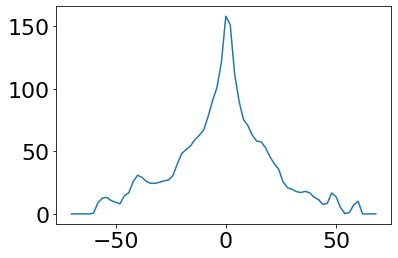

In [46]:
plt.plot(xbins, sigmas)
# plt.plot(xbins, means)

In [47]:
np.max(rn[0])

66.32128155848903